In [1]:
import os
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Settings

In [2]:
pathDB="DB-Rent"
constraintList=["Gràcia","Horta"] #DB file names have to contain "Gràcia" or "Horta". See above defined directory <pathDB> for all the available database files.
# constraintList=["Barcelona"] #DB file names have to contain "Barcelona". This will show all appartments in Barcelona.

## Load data

In [3]:
fileList=[]
for root, dirs, files in os.walk(pathDB):
    for file in files:
        for constraint in constraintList:
            if (constraint in file):
                fileList+=[os.path.join(root,file)]
                break

print(fileList)                
                
binList=np.loadtxt(fileList[0],dtype=int)[0]                  
dataList=np.loadtxt(fileList[0],dtype=int)[1:,1:]               
tList= np.loadtxt(fileList[0],dtype=int)[1:,0]            
tList=[datetime.datetime.strptime(str(int(t)),"%Y%m%d").date() for t in tList]

for file in fileList[1:]:
    dataList+=np.loadtxt(file,dtype=int)[1:,1:]


['DB-Rent/Barcelona - Horta.txt', 'DB-Rent/Barcelona - Vila de Gràcia.txt', 'DB-Rent/Barcelona - Camp d´en Grassot - Gràcia N..txt']


## Histogram

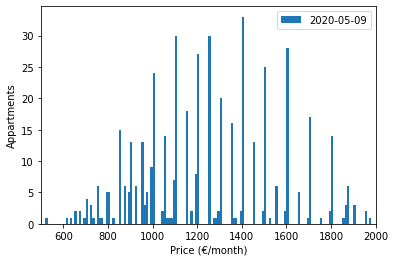

In [4]:
item=-1 #Histogram of last (most recent) item

tLast=tList[item]
data=dataList[item]
plt.figure()
plt.bar(binList[:-1],data,align="edge",width=(binList[1]-binList[0]),label=str(tList[item]))
plt.xlim(500,2000)
plt.xlabel("Price (€/month)")
plt.ylabel("Appartments")
plt.legend()
plt.show()

## Time evolution

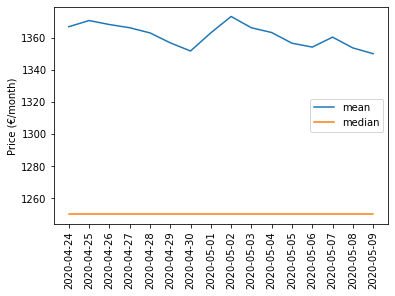

,Day,Mean (€/month),Median (€/month)
0,2020-04-24,1366.78,1250
1,2020-04-25,1370.62,1250
2,2020-04-26,1368.13,1250
3,2020-04-27,1366.14,1250
4,2020-04-28,1362.94,1250
5,2020-04-29,1356.72,1250
6,2020-04-30,1351.65,1250
7,2020-05-01,1362.98,1250
8,2020-05-02,1373.14,1250
9,2020-05-03,1366.11,1250


In [5]:
meanList=[]
medianList=[]
for data in dataList:
    meanList+=[np.sum(binList[:-1]*data)/np.sum(data)]
    medianList+=[binList[np.where(np.cumsum(data)>sum(data)/2)[0][0]]]
plt.figure()    
plt.plot(tList,meanList,label="mean")
plt.plot(tList,medianList,label="median")
date_form = DateFormatter("%Y-%m-%d")
ax=plt.gca()
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.xticks(rotation=90)
plt.legend()
plt.ylabel("Price (€/month)")
plt.show()
pd.DataFrame(np.array([tList,meanList,medianList]).T, columns=["Day","Mean (€/month)","Median (€/month)"])